In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
data = pd.read_csv('D:\data_science\Machine-Learning\minute_weather.csv')


In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
sample_df = data[(data['rowID']%10 == 0)]
sample_df.shape

(158726, 13)

In [8]:
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [10]:
sample_df[sample_df['rain_accumulation']==0].shape

(157812, 13)

In [12]:
sample_df[sample_df['rain_duration']==0].shape

(157237, 13)

In [16]:
del sample_df['rain_accumulation']
del sample_df['rain_duration']

KeyError: 'rain_accumulation'

In [17]:
del sample_df['rain_duration']

In [19]:
rows_before=sample_df.shape[0]
sample_df = sample_df.dropna()
rows_after = sample_df.shape[0]

In [20]:
# The rows we droped are..
rows_before - rows_after

46

In [21]:
sample_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [22]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [26]:
select_df = sample_df[features]

In [28]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [29]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


Scaling The feature using Standard scalar

In [31]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

Using K-means clustering

In [33]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("Model\n",model)

Model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [34]:
centers = model.cluster_centers_
centers

array([[ 0.12922643,  0.8472484 ,  1.41084535, -0.63832199,  1.67482823,
        -0.58902229, -0.71441832],
       [-0.21503528,  0.63012624,  0.40813601,  0.73536027,  0.51619718,
         0.6732506 , -0.14788811],
       [ 0.75011639,  0.41473274,  0.28940745, -0.52766634,  0.47656913,
        -0.53401579, -0.77567574],
       [-0.84538232, -1.1958515 ,  0.37486073,  0.33868751,  0.47301014,
         0.32672107,  1.36203502],
       [ 1.36881342, -0.08216988, -1.20721984, -0.04604093, -1.07622336,
        -0.02556123, -0.97763057],
       [-1.17533133, -0.87932637,  0.44598616,  1.97046991,  0.53810079,
         1.93166639,  0.91826612],
       [ 1.18957665, -0.25524295, -1.15503528,  2.12626074, -1.05346062,
         2.24347171, -1.13431373],
       [ 0.05867872, -0.7855825 , -1.19601562, -0.57056736, -1.04200388,
        -0.58500527,  0.87633866],
       [-0.16159736,  0.86289179, -1.31080378, -0.5900331 , -1.16646917,
        -0.60532813, -0.64281151],
       [ 0.23442278,  0.3206

In [35]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [36]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [37]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.129226,0.847248,1.410845,-0.638322,1.674828,-0.589022,-0.714418,0
1,-0.215035,0.630126,0.408136,0.735360,0.516197,0.673251,-0.147888,1
2,0.750116,0.414733,0.289407,-0.527666,0.476569,-0.534016,-0.775676,2
3,-0.845382,-1.195852,0.374861,0.338688,0.473010,0.326721,1.362035,3
4,1.368813,-0.082170,-1.207220,-0.046041,-1.076223,-0.025561,-0.977631,4
5,-1.175331,-0.879326,0.445986,1.970470,0.538101,1.931666,0.918266,5
6,1.189577,-0.255243,-1.155035,2.126261,-1.053461,2.243472,-1.134314,6
7,0.058679,-0.785582,-1.196016,-0.570567,-1.042004,-0.585005,0.876339,7
8,-0.161597,0.862892,-1.310804,-0.590033,-1.166469,-0.605328,-0.642812,8
9,0.234423,0.320600,1.887889,-0.651874,-1.551712,-0.576738,-0.283836,9


<h1>DRY DAYS</h1>

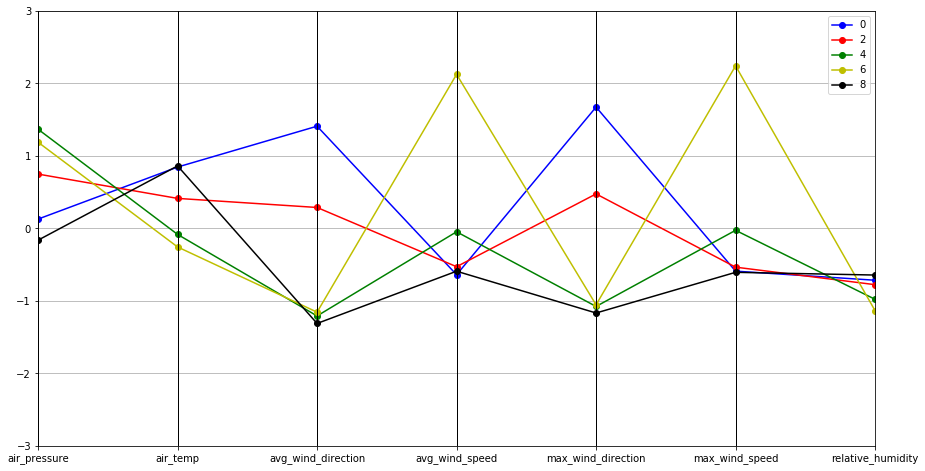

In [38]:
parallel_plot(P[P['relative_humidity'] < -0.5])

<h1> Warm days</h1>

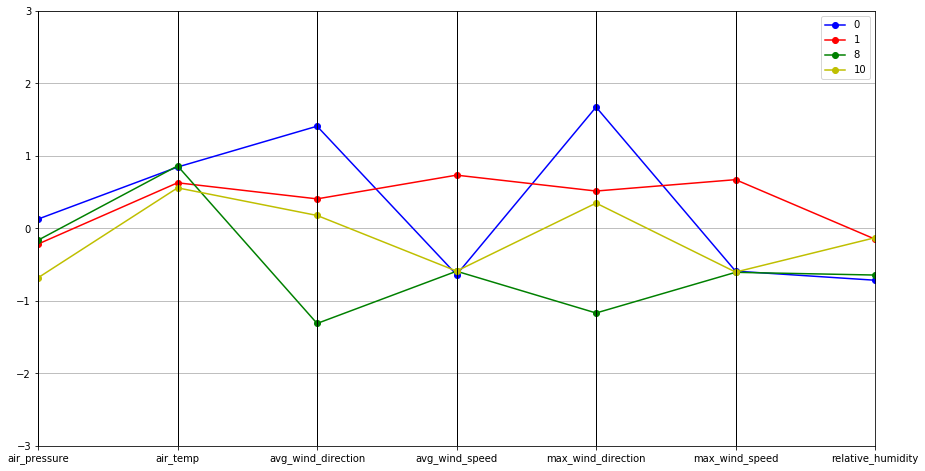

In [41]:
parallel_plot(P[P['air_temp'] > 0.5])

<h1>Cool days</h1>

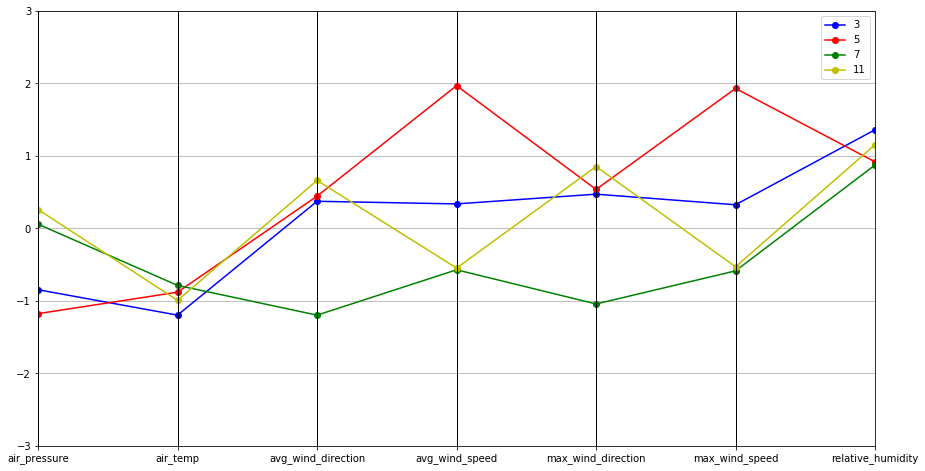

In [42]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])